## Handling Missing Values in Large-scale ML Pipelines:

**Task 1**: Impute with Mean or Median
- Step 1: Load a dataset with missing values (e.g., Boston Housing dataset).
- Step 2: Identify columns with missing values.
- Step 3: Impute missing values using the mean or median of the respective columns.

In [1]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Step 1: Load a dataset (California Housing as replacement for Boston Housing)
data = fetch_california_housing(as_frame=True)
df = data.frame

# Introduce artificial missing values for demonstration
np.random.seed(42)
df.loc[df.sample(frac=0.1).index, 'MedInc'] = np.nan
df.loc[df.sample(frac=0.05).index, 'AveRooms'] = np.nan

# Step 2: Identify columns with missing values
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:\n", missing_cols)

# Step 3: Impute missing values using mean or median
# Option A: Mean Imputation
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Option B: Median Imputation
imputer_median = SimpleImputer(strategy='median')
df_median_imputed = pd.DataFrame(imputer_median.fit_transform(df), columns=df.columns)

# Show before and after
print("\nMissing values before imputation:\n", df[missing_cols].isnull().sum())
print("\nMissing values after mean imputation:\n", df_mean_imputed[missing_cols].isnull().sum())
print("\nMissing values after median imputation:\n", df_median_imputed[missing_cols].isnull().sum())


Columns with missing values:
 Index(['MedInc', 'AveRooms'], dtype='object')

Missing values before imputation:
 MedInc      2064
AveRooms    1032
dtype: int64

Missing values after mean imputation:
 MedInc      0
AveRooms    0
dtype: int64

Missing values after median imputation:
 MedInc      0
AveRooms    0
dtype: int64


**Task 2**: Impute with the Most Frequent Value
- Step 1: Use the Titanic dataset and identify columns with missing values.
- Step 2: Impute categorical columns using the most frequent value.

In [2]:
# write your code from here
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Step 1: Load Titanic dataset (using seaborn's version)
titanic = sns.load_dataset('titanic')

# Identify columns with missing values
missing_cols = titanic.columns[titanic.isnull().any()]
print("Columns with missing values:\n", missing_cols)

# Typically, categorical columns with missing values in Titanic dataset are 'deck', 'embark_town', and 'age' is numeric
# Let's select categorical columns with missing values
cat_missing_cols = titanic.select_dtypes(include='category').columns.intersection(missing_cols)
# Or, since seaborn loads some columns as object, also include those:
cat_missing_cols = titanic.select_dtypes(include=['object', 'category']).columns.intersection(missing_cols)
print("\nCategorical columns with missing values:\n", cat_missing_cols)

# Step 2: Impute categorical columns using most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation on only the categorical columns with missing data
titanic_cat = titanic[cat_missing_cols]

titanic_cat_imputed = pd.DataFrame(imputer.fit_transform(titanic_cat), columns=cat_missing_cols)

# Replace original categorical columns with imputed ones
titanic[cat_missing_cols] = titanic_cat_imputed

# Check if missing values remain in categorical columns
print("\nMissing values after imputation:\n", titanic[cat_missing_cols].isnull().sum())


Columns with missing values:
 Index(['age', 'embarked', 'deck', 'embark_town'], dtype='object')

Categorical columns with missing values:
 Index(['embarked', 'deck', 'embark_town'], dtype='object')

Missing values after imputation:
 embarked       0
deck           0
embark_town    0
dtype: int64


**Task 3**: Advanced Imputation - k-Nearest Neighbors
- Step 1: Implement KNN imputation using the KNNImputer from sklearn.
- Step 2: Explore how KNN imputation improves data completion over simpler methods.

In [4]:
# write your code from here
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.datasets import fetch_california_housing

# Load dataset (California Housing again, with artificial missingness)
data = fetch_california_housing(as_frame=True)
df = data.frame.copy()

# Introduce missing values artificially for demonstration
np.random.seed(0)
missing_rate = 0.1
for col in df.columns:
    df.loc[df.sample(frac=missing_rate).index, col] = np.nan

print("Missing values before imputation:\n", df.isnull().sum())

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Fit and transform the data
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

print("\nMissing values after KNN imputation:\n", df_knn_imputed.isnull().sum())


Missing values before imputation:
 MedInc         2064
HouseAge       2064
AveRooms       2064
AveBedrms      2064
Population     2064
AveOccup       2064
Latitude       2064
Longitude      2064
MedHouseVal    2064
dtype: int64

Missing values after KNN imputation:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


NameError: name 'df_knn_imputed' is not defined

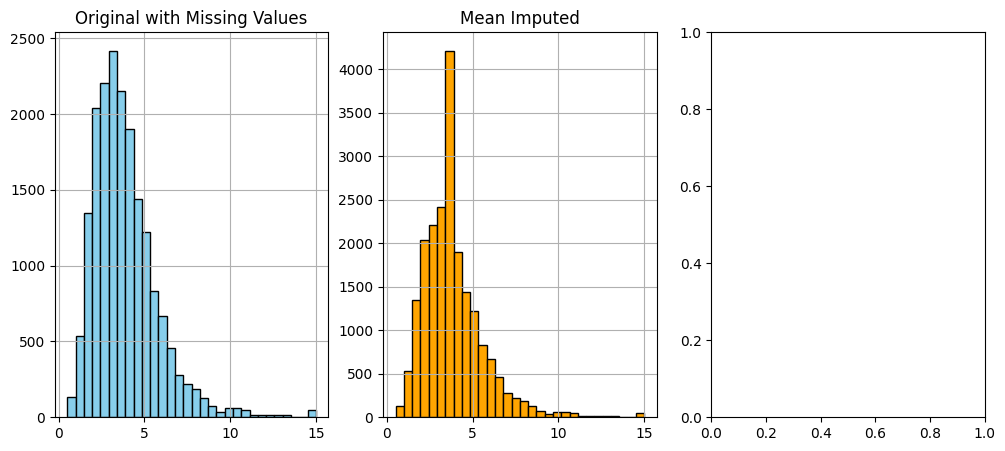

In [3]:
from sklearn.impute import SimpleImputer

# Simple mean imputation for comparison
mean_imputer = SimpleImputer(strategy='mean')
df_mean_imputed = pd.DataFrame(mean_imputer.fit_transform(df), columns=df.columns)

# Example: Compare distributions for one column before and after imputation
import matplotlib.pyplot as plt

col_to_compare = 'MedInc'

plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
df[col_to_compare].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Original with Missing Values')

plt.subplot(1,3,2)
df_mean_imputed[col_to_compare].hist(bins=30, color='orange', edgecolor='black')
plt.title('Mean Imputed')

plt.subplot(1,3,3)
df_knn_imputed[col_to_compare].hist(bins=30, color='green', edgecolor='black')
plt.title('KNN Imputed')

plt.tight_layout()
plt.show()


## Feature Scaling & Normalization Best Practices:

**Task 1**: Standardization
- Step 1: Standardize features using StandardScaler.
- Step 2: Observe how standardization affects data distribution.

In [5]:
# write your code from here
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Create a sample dataset with 1 feature to visualize effect
np.random.seed(0)
data = pd.DataFrame({
    'Feature1': np.random.exponential(scale=2, size=1000)  # skewed data
})

print("Original Data Summary:")
print(data.describe())

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform data
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print("\nStandardized Data Summary:")
print(data_scaled.describe())


Original Data Summary:
          Feature1
count  1000.000000
mean      2.007080
std       2.059218
min       0.001092
25%       0.569010
50%       1.312952
75%       2.673183
max      17.122062

Standardized Data Summary:
           Feature1
count  1.000000e+03
mean  -4.707346e-17
std    1.000500e+00
min   -9.746381e-01
25%   -6.987071e-01
50%   -3.372522e-01
75%    3.236356e-01
max    7.343830e+00


**Task 2**: Min-Max Scaling

- Step 1: Scale features to lie between 0 and 1 using MinMaxScaler.
- Step 2: Compare with standardization.

In [6]:
# write your code from here
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# Sample skewed data, same as before
np.random.seed(0)
data = pd.DataFrame({
    'Feature1': np.random.exponential(scale=2, size=1000)
})

# Initialize scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Fit and transform the data
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)


**Task 3**: Robust Scaling
- Step 1: Scale features using RobustScaler, which is useful for data with outliers.
- Step 2: Assess changes in data scaling compared to other scaling methods.

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Create skewed data with outliers
np.random.seed(0)
data = pd.DataFrame({
    'Feature1': np.concatenate([
        np.random.normal(loc=50, scale=5, size=990),  # main bulk
        np.random.uniform(low=100, high=200, size=10)  # outliers
    ])
})

print("Original Data Summary:")
print(data.describe())

# Initialize scalers
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Scale data
data_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data), columns=data.columns)
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)
data_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)
# write your code from here

Original Data Summary:
          Feature1
count  1000.000000
mean     50.809660
std      11.832977
min      34.769285
25%      46.536603
50%      49.742073
75%      53.218748
max     193.786437


## Feature Selection Techniques:
### Removing Highly Correlated Features:

**Task 1**: Correlation Matrix
- Step 1: Compute correlation matrix.
- Step 2: Remove highly correlated features (correlation > 0.9).

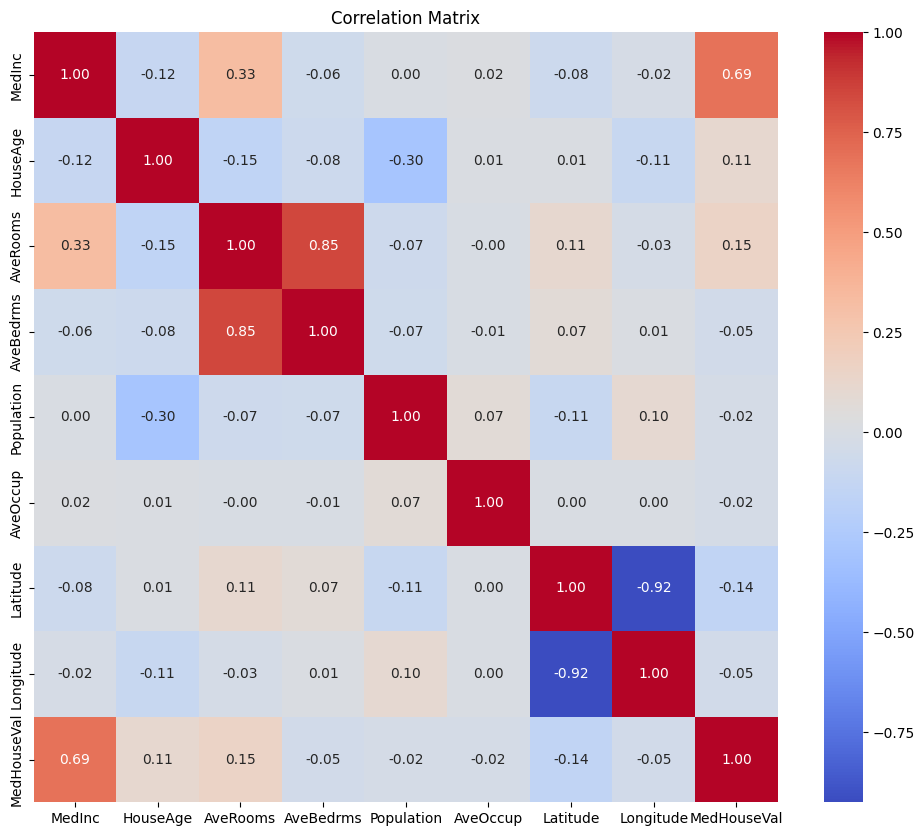

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset (California Housing)
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
# write your code from here

### Using Mutual Information & Variance Thresholds:

**Task 2**: Mutual Information
- Step 1: Compute mutual information between features and target.
- Step 2: Retain features with high mutual information scores.

In [9]:
# write your code from here
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Compute mutual information between each feature and target
mi_scores = mutual_info_regression(X, y, random_state=42)

# Create a series with feature names and their MI scores
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Mutual Information scores:\n", mi_series)


Mutual Information scores:
 Longitude     0.400147
MedInc        0.387097
Latitude      0.370763
AveRooms      0.102874
AveOccup      0.072716
HouseAge      0.033368
AveBedrms     0.024149
Population    0.020878
dtype: float64


**Task 3**: Variance Threshold
- Step 1: Implement VarianceThreshold to remove features with low variance.
- Step 2: Analyze impact on feature space.

In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data

print("Original feature shape:", X.shape)

# Initialize VarianceThreshold with a threshold (e.g., remove features with variance <= 0.01)
selector = VarianceThreshold(threshold=0.01)

# Fit and transform the data
X_reduced = selector.fit_transform(X)

# Get retained feature names
retained_features = X.columns[selector.get_support()]

print(f"Features retained after variance threshold:\n{list(retained_features)}")
print("Reduced feature shape:", X_reduced.shape)
# write your code from here

Original feature shape: (20640, 8)
Features retained after variance threshold:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Reduced feature shape: (20640, 8)
